<a href="https://colab.research.google.com/github/varshini0317/Mini-Project/blob/main/FACE_RECOGNITION_DUE_TO_ETHNICITY_USING_DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings('ignore')

In [51]:
!head -n 5 /content/label.csv

age,ethnicity,gender,img_name,pixels
1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 149 147 145 146 147 148 149 149 150 153 153 153 152 153 153 153 153 153 151 149 147 146 146 144 143 140 134 129 129 126 122 121 119 118 118 99 53 130 129 128 126 127 130 135 141 143 143 144 145 143 142 144 145 146 149 149 148 151 151 151 151 152 153 153 153 153 149 148 147 146 146 142 141 138 133 130 130 128 123 124 122 120 117 98 52 131 129 130 129 129 134 138 144 145 143 143 139 140 138 139 140 142 145 147 149 151 149 149 149 151 152 151 150 150 148 147 145 144 142 140 137 136 135 134 131 128 126 126 123 122 114 97 50 135 134 133 132 131 136 142 145 147 144 141 143 138 131 133 134 137 139 143 147 148 149 149 149 151 151 149 147 147 146 141 139 135 137 137 137 137 138 137 134 132 129 130 124 124 115 95 52 138 139 139 135 134 138 140 140 140 140 140 140 139 134 131 127 131 131 133 138 143 148 149 149 150 151 148 144 141 138 139 133 133 137 139 139 141 140 140 136 132 13

In [52]:
!wc -l /content/label.csv

23706 /content/label.csv


In [53]:
df = pd.read_csv('/content/label.csv', engine='python')
df = shuffle(df)
df.head()

,age,ethnicity,gender,img_name,pixels
12780,34,0,0,20170116193345729.jpg.chip.jpg,120 118 74 62 116 122 135 128 130 136 140 145 ...
172,1,4,0,20161221195039712.jpg.chip.jpg,195 218 219 219 218 212 209 206 205 203 199 19...
11619,31,2,0,20170116170840810.jpg.chip.jpg,57 48 57 54 43 54 49 38 47 48 46 47 51 52 54 5...
1053,1,2,1,20161219194531091.jpg.chip.jpg,36 48 55 67 81 84 91 99 101 104 107 111 112 11...
23524,9,0,0,20170110225112927.jpg.chip.jpg,45 43 54 72 78 73 68 99 85 72 45 76 69 72 70 5...


In [54]:
df.shape

(23705, 5)

In [55]:
num_pixels = len(df['pixels'][0].split(" "))
img_height = int(np.sqrt(len(df['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(df['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)

2304 48 48


In [56]:
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))

In [57]:
X = np.array(df['pixels'].tolist())
X = np.reshape(X, (-1, 48, 48,1))

In [58]:
y = df['ethnicity']
X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(X, y, test_size=0.3, random_state=44)

In [59]:
train_datagen=ImageDataGenerator(rescale=1/255)
train_generator_ethnicity=train_datagen.flow(
    X_train_ethnicity ,y_train_ethnicity ,batch_size=32
)

test_datagen=ImageDataGenerator(rescale=1/255)
test_generator_ethnicity=test_datagen.flow(
    X_test_ethnicity ,y_test_ethnicity ,batch_size=32

)

In [60]:
train_generator_ethnicity =train_datagen.flow(
    X_train_ethnicity ,y_train_ethnicity ,batch_size=64
)

test_generator_ethnicity =test_datagen.flow(
    X_test_ethnicity ,y_test_ethnicity ,batch_size=64
)

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [62]:
model_ethnicity = Sequential()

model_ethnicity.add(Conv2D(16,(3,3), padding='same',activation='relu',input_shape=(48,48,1)))
model_ethnicity.add(MaxPooling2D(2,2))

model_ethnicity.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model_ethnicity.add(MaxPooling2D(2,2))

model_ethnicity.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model_ethnicity.add(MaxPooling2D(2,2))


model_ethnicity.add(Flatten())
model_ethnicity.add(Dense(128,activation='relu'))


model_ethnicity.add(Dense(5,activation='softmax'))

model_ethnicity.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_ethnicity.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          (None, 48, 48, 16)        160       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_98 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_99 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)         

In [63]:
train_datagen=ImageDataGenerator(rescale=1/255)
train_generator_ethnicity=train_datagen.flow(
    X_train_ethnicity ,y_train_ethnicity ,batch_size=32
)

test_datagen=ImageDataGenerator(rescale=1/255)
test_generator_ethnicity=test_datagen.flow(
    X_test_ethnicity ,y_test_ethnicity ,batch_size=32

)

In [64]:
train_datagen_ethnicity = ImageDataGenerator()
test_datagen_ethnicity = ImageDataGenerator()

In [65]:
train_datagen_ethnicity.fit(X_train_ethnicity)
test_datagen_ethnicity.fit(X_test_ethnicity)

In [66]:
callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, verbose=1),
]

In [67]:
model_ethnicity.fit(
    train_generator_ethnicity,
    epochs= 10,
    validation_data= test_generator_ethnicity,
    callbacks= callbacks
)

Epoch 1/10
519/519 [==============================] - 43s 80ms/step - loss: 1.1295 - accuracy: 0.5667 - val_loss: 0.9480 - val_accuracy: 0.6569 - lr: 0.0010
Epoch 2/10
519/519 [==============================] - 40s 77ms/step - loss: 0.8443 - accuracy: 0.7008 - val_loss: 0.7935 - val_accuracy: 0.7223 - lr: 0.0010
Epoch 3/10
519/519 [==============================] - 40s 77ms/step - loss: 0.7508 - accuracy: 0.7354 - val_loss: 0.7452 - val_accuracy: 0.7410 - lr: 0.0010
Epoch 4/10
519/519 [==============================] - 42s 80ms/step - loss: 0.6893 - accuracy: 0.7603 - val_loss: 0.7102 - val_accuracy: 0.7579 - lr: 0.0010
Epoch 5/10
519/519 [==============================] - 41s 79ms/step - loss: 0.6454 - accuracy: 0.7722 - val_loss: 0.6941 - val_accuracy: 0.7559 - lr: 0.0010
Epoch 6/10
519/519 [==============================] - 46s 88ms/step - loss: 0.5909 - accuracy: 0.7933 - val_loss: 0.7012 - val_accuracy: 0.7545 - lr: 0.0010
Epoch 7/10
519/519 [==============================] - 41s 

<Axes: title={'center': 'Ethnicity'}>

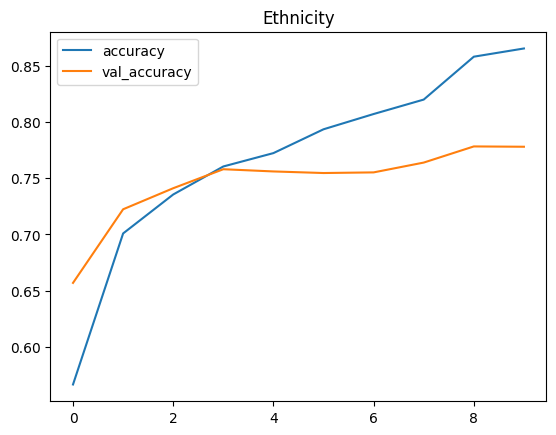

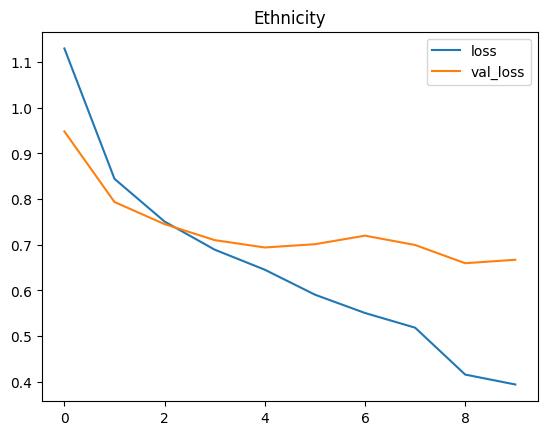

In [69]:
losses_ethnicity = pd.DataFrame(model_ethnicity.history.history)
losses_ethnicity[['accuracy','val_accuracy']].plot(title='Ethnicity')
losses_ethnicity[['loss','val_loss']].plot(title='Ethnicity')


In [70]:
model_ethnicity.save('my_model.h5')

In [71]:
from keras.preprocessing import image

In [72]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/my_model.h5')

In [73]:
# Function to predict ethnicity of uploaded image
def predict_ethnicity(image_path):
    img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    ethnicity_labels = ["White", "Black", "Asian", "Indian", "Hispanic"]
    predicted_ethnicity = ethnicity_labels[np.argmax(prediction)]
    return predicted_ethnicity

In [74]:
# Example usage:
image_path ='/content/10_0_3_20170105175322885.jpg.chip.jpg'
predicted_ethnicity = predict_ethnicity(image_path)
print("Predicted ethnicity:", predicted_ethnicity)

1/1 [==============================] - 0s 88ms/step
Predicted ethnicity: Indian
